<a href="https://colab.research.google.com/github/m-njera/crop_disease/blob/master/NasNet_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

import keras
from keras.applications.nasnet import NASNetMobile,NASNetLarge
from keras.applications.inception_v3 import inception_v3
from keras.models import Sequential
from keras import layers
from keras.layers import Flatten,Dense, Dropout,Input,Conv2D,MaxPooling2D,Activation,GlobalAveragePooling2D
from keras.models import Model
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

Using TensorFlow backend.


#Load Data

In [0]:
base_dir = '/content/drive/My Drive/crop'
train_data_dir = os.path.join(base_dir,'train')

In [0]:
# import os,shutil

# source_files = "/content/drive/My Drive/crop/train/stem_rust/*.jfif" ## source path

# target_folder = "/content/drive/My Drive/crop/models" ## destination path

# os.chdir(current_path)
# filelist=glob.glob(source_files)
# for single_file in filelist:
#      # move file with full paths as shutil.move() parameters
#     shutil.move(single_file,target_folder) 

In [0]:
image_width = 224
image_height = 224
batch_size=32

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range = 40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True
                             )

train_data_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_width,image_height),
    batch_size=batch_size,
    class_mode = 'categorical'
)


Found 876 images belonging to 3 classes.


In [0]:
x1, y1 = train_data_generator.next()
print(x1.shape,y1.shape)

(32, 224, 224, 3) (32, 3)


In [0]:
nb_train_samples = 876
epochs = 10

#Build Model

In [0]:
from keras.applications.inception_v3 import InceptionV3

In [0]:
loaded_model.load_weights("model.h5")

NameError: ignored

In [0]:
def model():
  base_model = InceptionV3(weights='imagenet', include_top=False)
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.3)(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.3)(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.3)(x)
  predictions = keras.layers.Dense(3, activation='softmax')(x)
  model = keras.models.Model(inputs=base_model.inputs, outputs=predictions)
  
  return model

In [0]:
model= model()

87916544/87910968 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, None, None, 3 96          conv2d_189[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, None, None, 3 0           batch_normalization_189[0][0]    
____________________________________________________________________________________________

In [0]:
model_dir = '/content/drive/My Drive/crop'
plot_model(model, to_file=model_dir+'model.png',show_shapes=True, show_layer_names=True)

In [0]:
# img = mpimg.imread(model_dir+'model.png')
# plt.figure(figsize=(30,8))
# imgplot = plt.imshow(img)

#Train Model 

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-4, decay=1e-6, momentum=0.9, nesterov=True), metrics=["accuracy"])
hist = model.fit_generator(train_data_generator,steps_per_epoch=(867/30),epochs=30,verbose=1)

Epoch 1/30
29/28 [==============================] - 576s 20s/step - loss: 0.8876 - acc: 0.5524
Epoch 2/30
29/28 [==============================] - 559s 19s/step - loss: 0.8777 - acc: 0.5671
Epoch 3/30
29/28 [==============================] - 559s 19s/step - loss: 0.8673 - acc: 0.5768
Epoch 4/30
29/28 [==============================] - 545s 19s/step - loss: 0.8588 - acc: 0.5680
Epoch 5/30
29/28 [==============================] - 578s 20s/step - loss: 0.8407 - acc: 0.5776
Epoch 6/30
29/28 [==============================] - 563s 19s/step - loss: 0.8462 - acc: 0.5718
Epoch 7/30
29/28 [==============================] - 558s 19s/step - loss: 0.8381 - acc: 0.5923
Epoch 8/30
29/28 [==============================] - 561s 19s/step - loss: 0.8550 - acc: 0.5778
Epoch 9/30
29/28 [==============================] - 555s 19s/step - loss: 0.8564 - acc: 0.5744
Epoch 10/30
29/28 [==============================] - 559s 19s/step - loss: 0.8161 - acc: 0.6165
Epoch 11/30
29/28 [==============================

In [0]:
model.save("/content/drive/My Drive/crop/model2.h5")

#Plotting Loss & Accuracy

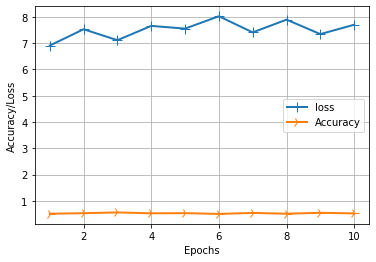

In [0]:
history_dict  = history.history
loss_values = history_dict['loss']
accu_values = history_dict['acc']
epochs_display= range(1,len(loss_values)+1)


loss_line = plt.plot(epochs,loss_values,label="loss")
accu_line = plt.plot(epochs,accu_values,label='Accuracy')

plt.setp(loss_line, linewidth=2.0,marker='+',markersize=10.0)
plt.setp(accu_line,linewidth=2.0,marker='4',markersize=10.0)


plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')

plt.grid(True)
plt.legend()

plt.show()
